<a href="https://colab.research.google.com/github/hufesa/Crehana-IA-imagenes/blob/main/Plantilla_NN_CIFAR100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando librerías

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Carga de Datos

Importamos las librerías que utilziaremos para cargar los datos para la red neuronal:

In [3]:
from keras.datasets import cifar10
from keras import layers, models


Corre la siguiente linea para cargar tu dataset

In [4]:
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Revisa las dimensiones de tus datos

In [5]:
train_data.shape

(50000, 32, 32, 3)

Abre el primer registro de train

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)
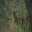

In [6]:
train_data[10]

Visualiza la primer imagen del dataset

<function matplotlib.pyplot.show(close=None, block=None)>

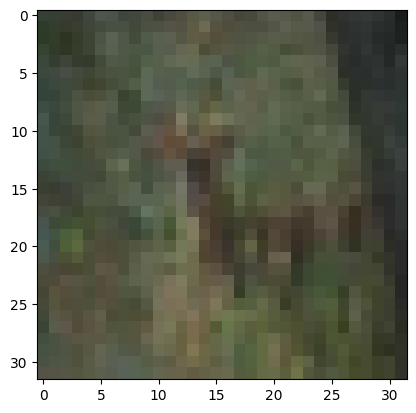

In [7]:
plt.imshow(train_data[10])
plt.show

In [8]:
train_labels[10]

array([4], dtype=uint8)

# Modelo

Crea tu red neuronal con una forma de 32*32 px

In [9]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(32*32,))) #Tenemos 512 neuronas de entrada, que tienen una forma de 32*32 px
model.add(layers.Dense(10, activation = 'softmax')) #10 neuronas de la posible salida

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy', #Función de pérdida
              metrics = ['accuracy'] #Variable a optimizar
)

# Transformación de datos

Ejecuta la carga de datos para el train y test

In [11]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Revisa las dimensiones de los datos

In [21]:
train_data.shape
test_data.shape


(10000, 32, 32, 3)

Haz un reshape para x_test y x_train




In [19]:
x_train = train_data.reshape((150000, 32*32))
x_train = x_train.astype('float32')/255

In [23]:
x_test = test_data.reshape(30000, 32*32)
x_test = x_test.astype('float32')/255

Importa la librería "to_categorical" de tensorflow

In [24]:
from tensorflow.keras.utils import to_categorical

Convierte a categoricas las variables de y_train y y_test

In [33]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)



Imprime el primer registro de las etiquetas de train
Considera que es un vector [x,x]

In [46]:
train_labels[0,0]

np.uint8(6)

In [47]:
y_train[0,0]

np.float64(0.0)

# Entrenamiento

Iteraciones de las épocas

In [43]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 1024, but received input with shape (None, 10)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 10), dtype=float32)
  • training=True
  • mask=None
  • kwargs=<class 'inspect._empty'>

# Evaluación

Evalua el set de train y el set de test